Họ và tên: Huỳnh Thiện Tùng
MSSV: 19522492
Bài tập 02 ngày 10/03/2022

# Câu 2: Cài đặt Linear Regression với numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

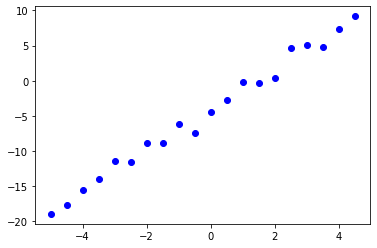

In [2]:
# generate the data
x = np.arange(-5, 5, 0.5)
n_samples = len(x)
noise = np.random.normal(0, 1, n_samples)
y = 3.0*x - 4.0 + noise
plt.plot(x, y, 'bo')

In [3]:
x

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [4]:
ones = np.ones((1, n_samples))
X = np.concatenate((ones, [x]))
X

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
         1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]])

In [5]:
# Generate hyperparameter
theta = np.array(([-5.0], [-1.0]))
learning_rate = 0.001
epsilon = 1e-9

In [6]:
while True:
    nabla = (1 / 2*n_samples) * np.dot(X, (np.dot(theta.T, X) - y).T)
    theta = theta - learning_rate * nabla
    nabla = (1 / 2*n_samples) * np.dot(X, (np.dot(theta.T, X) - y).T)
    if abs(nabla[0][0]) < epsilon and abs(nabla[1][0]) < epsilon:
        break

print('Gia tri cua theta toi uu la: ', theta)

Gia tri cua theta toi uu la:  [[-4.12736849]
 [ 2.87408786]]


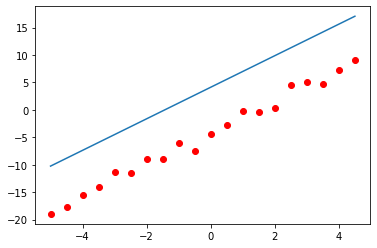

In [7]:
x_vis = np.arange(-5, 5, 0.5)
y_vis = theta[1][0] * x_vis - theta[0][0]
plt.plot(x, y, 'ro')
plt.plot(x_vis, y_vis)

# Câu 3: Cài đặt Logistic Regression với numpy

In [8]:
!gdown --id 1Upqoz2gIAYq6LByD7YjHU-9_9K4EOhOh

Downloading...
From: https://drive.google.com/uc?id=1Upqoz2gIAYq6LByD7YjHU-9_9K4EOhOh
To: /content/User_Data.csv
100% 10.9k/10.9k [00:00<00:00, 15.2MB/s]


In [9]:
import pandas as pd

In [54]:
dataset = pd.read_csv('./User_Data.csv')

In [55]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [56]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [58]:
x = dataset.iloc[:10, [2, 3]].values
y = dataset.iloc[:10, 4].values
x = x.reshape(x.shape[1], x.shape[0])
y = y.reshape(1, y.shape[0])

In [59]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [100]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(theta.T, X))
    epsilon = 1e-5
    cost = -np.sum(np.dot(y.T, np.log(h+epsilon)) + np.dot((1-y).T, np.log(1-h + epsilon)))/y.shape[1]
    return cost

In [106]:
def predict(X, theta, threshold=0.5):
    z = sigmoid(np.dot(theta.T, X))
    if z >= threshold:
        return 1
    return 0

In [96]:
x = np.array(x, dtype=np.float128)
y = np.array(y, dtype=np.float128)

In [97]:
print(theta.shape)
print(x.shape)
print(y.shape)

(2, 1)
(2, 10)
(1, 10)


In [107]:
x

array([[1.9e+01, 1.9e+04, 3.5e+01, 2.0e+04, 2.6e+01, 4.3e+04, 2.7e+01,
        5.7e+04, 1.9e+01, 7.6e+04],
       [2.7e+01, 5.8e+04, 2.7e+01, 8.4e+04, 3.2e+01, 1.5e+05, 2.5e+01,
        3.3e+04, 3.5e+01, 6.5e+04]], dtype=float128)

In [110]:
# Generate hyperparameter
theta = np.array(([-5.0], [-1.0]))
learning_rate = 0.001
n_samples = len(y)
max_iterations = 1000
update_after_iter = 1

In [113]:
for i in range(max_iterations):
    z = sigmoid(np.dot(theta.T, x))
    nabla = np.dot(x, (z - y).T)
    theta = theta - learning_rate * nabla
    # if i % update_after_iter == 0:
        # print(f'Cost at {i+1}/{max_iterations}: {compute_cost(x, y, theta)}')
print('Gia tri cua theta toi uu la: ', theta)

Gia tri cua theta toi uu la:  [[ 121.874]
 [-193.146]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
